# Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

## 1. Open an ECG file into the `ecg` variable
- Download the file: http://denis.mottet.free.fr/M2R/WORK/DATA/ECGu.txt
- We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [7]:
fNameECG = "C:/Users/singa/Documents/SANTE/HAH913E-2024-ECG_001/data/ECGu_hz.txt"

However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

#### **Définition du chemin du fichier texte**

In [9]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "data/ECGu.txt"

### 1.2. Read the ecg file

The ECG recording equipment manufacturers instructions specify:

-  
Leads recorded :` I, II, II` 
- 
Sampling frequency `: 1024 ` 
- z
A/D converter gai ` : 520 µV per u`nit

#### **Importation du fichier texte**

In [11]:
import numpy as np # importation de la bibliothéque numpy 

ecg = np.genfromtxt(fNameECG, delimiter=' ') # espace entre les colonnes du fichier txt

In [13]:
print(ecg) # afficher ecg

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]


#### **Fichier texte en tableau pandas**

(Plus simple à manipuler)

In [15]:
import pandas as pd

ecg = pd.read_csv(fNameECG, sep=" ", header=None)
print(ecg)

          0      1      2   3
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -119.0 -119.0 NaN
2    -275.0 -118.0 -121.0 NaN
3    -275.0 -121.0 -112.0 NaN
4    -273.0 -120.0 -105.0 NaN
...     ...    ...    ...  ..
6495    3.0  -92.0   28.0 NaN
6496    1.0  -86.0   22.0 NaN
6497   -4.0  -83.0   21.0 NaN
6498   -9.0  -88.0   31.0 NaN
6499  -16.0  -96.0   33.0 NaN

[6500 rows x 4 columns]


#### **Renommer les collonnes du tableau pandas**

In [17]:
ecg.columns = ['I', 'II', 'III','IV'] # Leads recorded

print(ecg)

          I     II    III  IV
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -119.0 -119.0 NaN
2    -275.0 -118.0 -121.0 NaN
3    -275.0 -121.0 -112.0 NaN
4    -273.0 -120.0 -105.0 NaN
...     ...    ...    ...  ..
6495    3.0  -92.0   28.0 NaN
6496    1.0  -86.0   22.0 NaN
6497   -4.0  -83.0   21.0 NaN
6498   -9.0  -88.0   31.0 NaN
6499  -16.0  -96.0   33.0 NaN

[6500 rows x 4 columns]


#### **Suppression d'une colonne**

In [19]:
ecg = ecg.drop('IV', axis=1) # fonction pour supprimer la colonne IV car valeur NaN

In [21]:
print(ecg)

          I     II    III
0    -275.0 -119.0 -119.0
1    -275.0 -119.0 -119.0
2    -275.0 -118.0 -121.0
3    -275.0 -121.0 -112.0
4    -273.0 -120.0 -105.0
...     ...    ...    ...
6495    3.0  -92.0   28.0
6496    1.0  -86.0   22.0
6497   -4.0  -83.0   21.0
6498   -9.0  -88.0   31.0
6499  -16.0  -96.0   33.0

[6500 rows x 3 columns]


#### **Définition des différentes pistes ECG**

In [23]:
ecg_i=ecg[["I"]]

In [25]:
ecg_ii=ecg[["II"]]

In [27]:
ecg_iii=ecg[["III"]]

# 2. Plot the content of the `egc` variable 

#### **Affichage des trois pistes ecg**

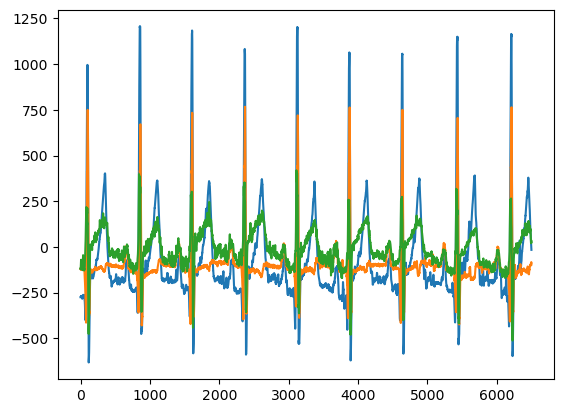

In [29]:
import matplotlib.pyplot as plt # pour tracer et visualiser les données sous forme de graphiques

plt.plot(ecg)
plt.show()

#### **Affichage des pistes de manière séparé**

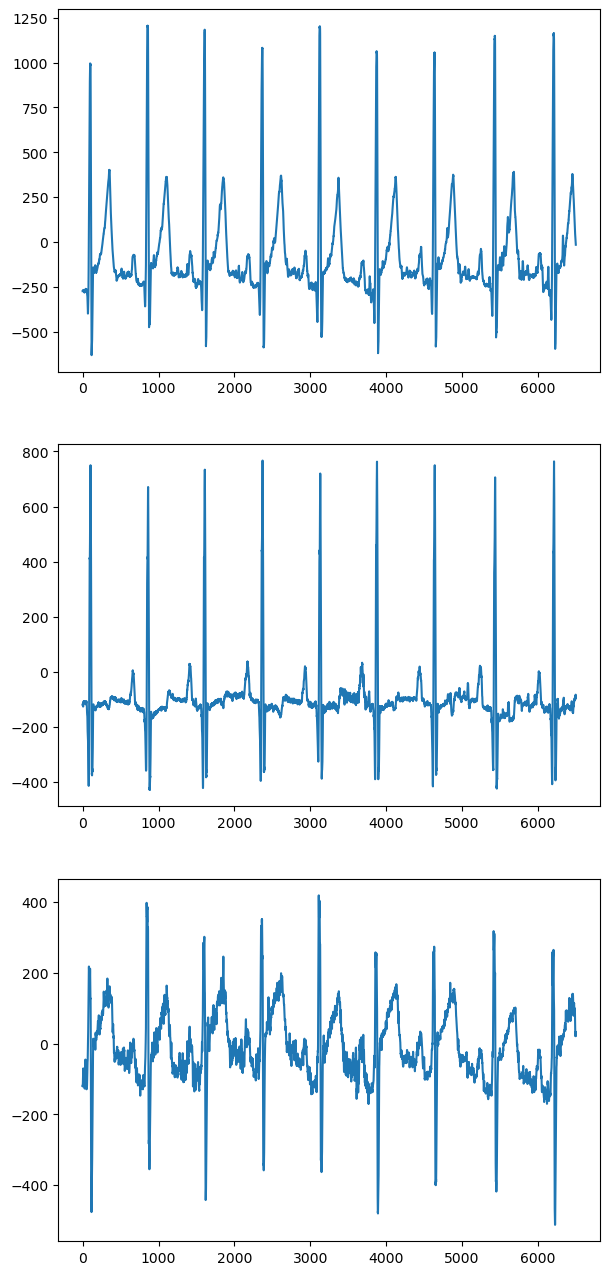

In [31]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(7, 16)) # dimension des figures

nbplot = 3 # nombre de figures qui vont être rejoint dans une seule et même figure

# Tracer 
# Première figure 
plt.subplot(nbplot, 1, 1) 
plt.plot(ecg_i)

# Seconde figure
plt.subplot(nbplot, 1, 2) 
plt.plot(ecg_ii)

# Troisième figure
plt.subplot(nbplot, 1, 3)
plt.plot(ecg_iii)
plt.show()


#### **Ajout d'une grille**

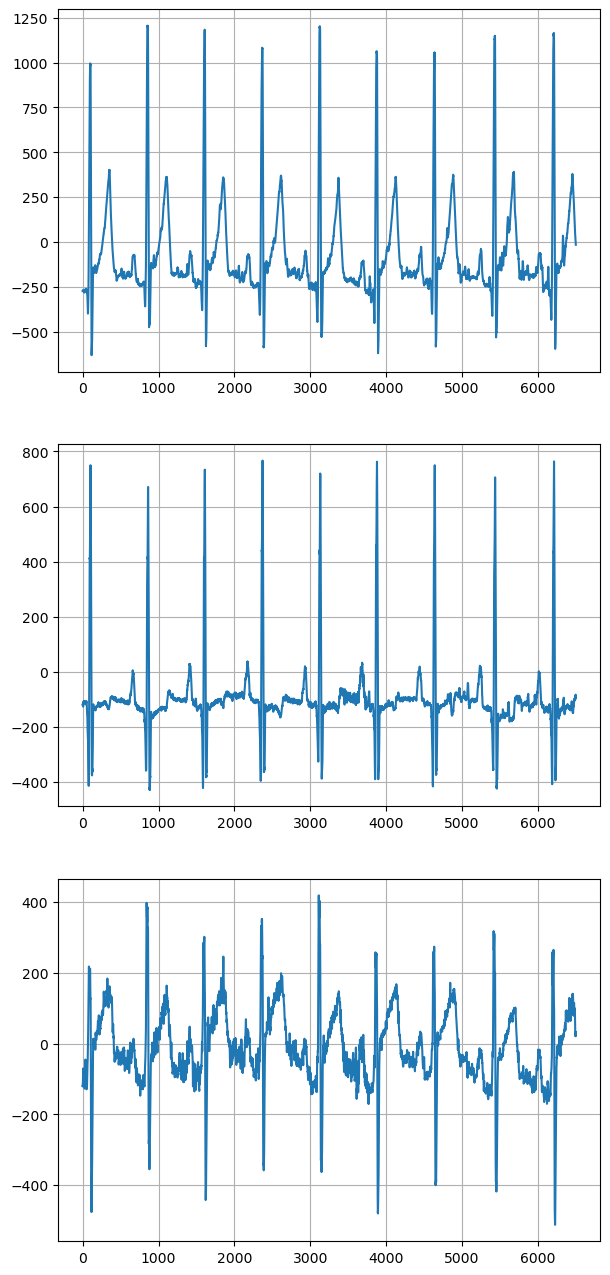

In [33]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(7, 16))

nbplot = 3

# Première figure
plt.subplot(nbplot, 1, 1)
plt.plot(ecg_i)
plt.grid()

# Seconde figure
plt.subplot(nbplot, 1, 2)
plt.plot(ecg_ii)
plt.grid()

# Troisième figure
plt.subplot(nbplot, 1, 3)
plt.plot(ecg_iii)
plt.grid() 

plt.show()


#### **Modification couleur et format des grilles et ajout d'un titre**

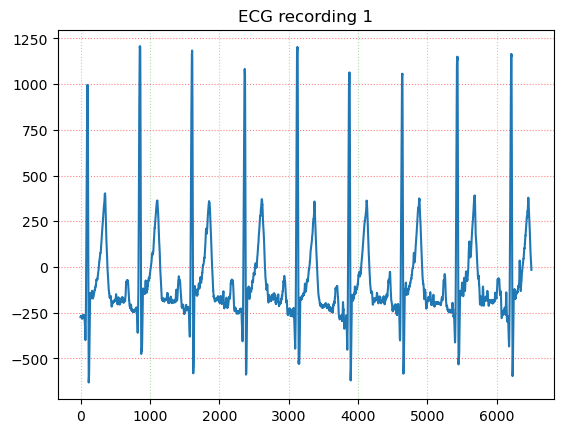

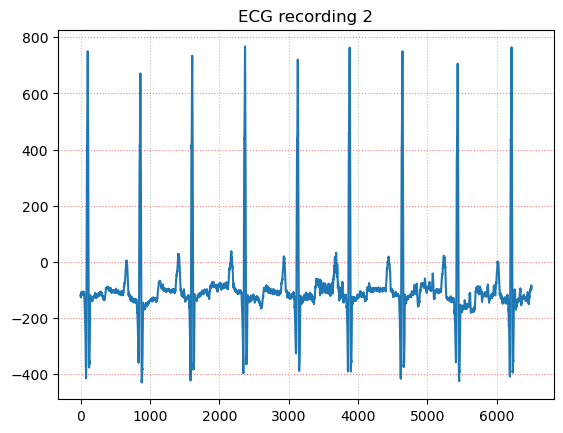

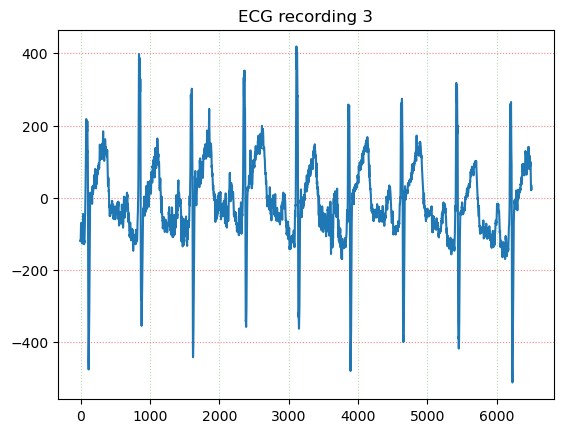

In [35]:
import matplotlib.pyplot as plt

# Première figure
fig, ax = plt.subplots()

# GRADUATION
# Lignes verticales
ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) #  alpha=0.3 donc opacité de 30% 
# Lignes horizontales
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
# Lignes horizontales additionnelles 
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(ecg_i)
ax.set_title('ECG recording 1')

# Seconde figure
fig, ax = plt.subplots()

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(ecg_ii)
ax.set_title('ECG recording 2')

# Troisième figure
fig, ax = plt.subplots()

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(ecg_iii) 
ax.set_title('ECG recording 3')

plt.show()

#### **Ajout du gain**

In [47]:
ecg_1 = ecg_i * 520
ecg_2 = ecg_ii * 520
ecg_3 = ecg_iii * 520

#### **Samplig frequency**

In [49]:
np.shape(ecg) # dimension 

(6500, 3)

In [104]:
duration = 6500 / 1024  # échantillonné à 1024 (6.34765625 secondes x 1024 s-1 = 6500 données)
print(duration)
time = np.linspace(0, duration, 6500)

6.34765625


In [106]:
print(time)

[0.00000000e+00 9.76712764e-04 1.95342553e-03 ... 6.34570282e+00
 6.34667954e+00 6.34765625e+00]


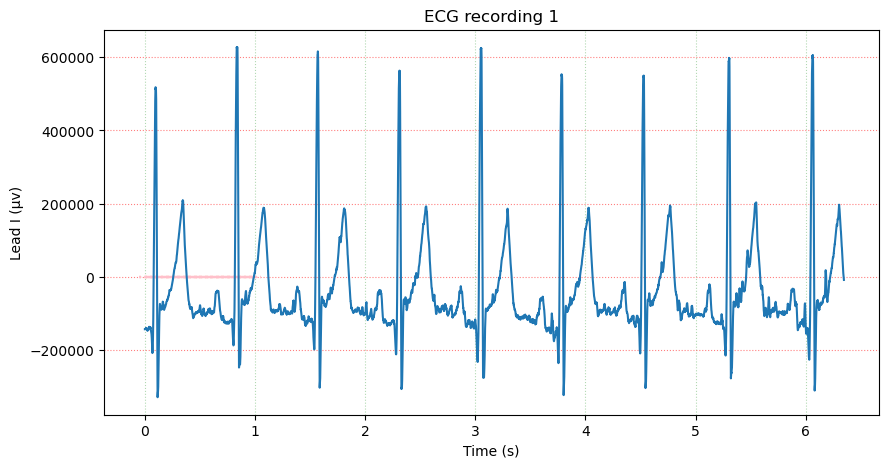

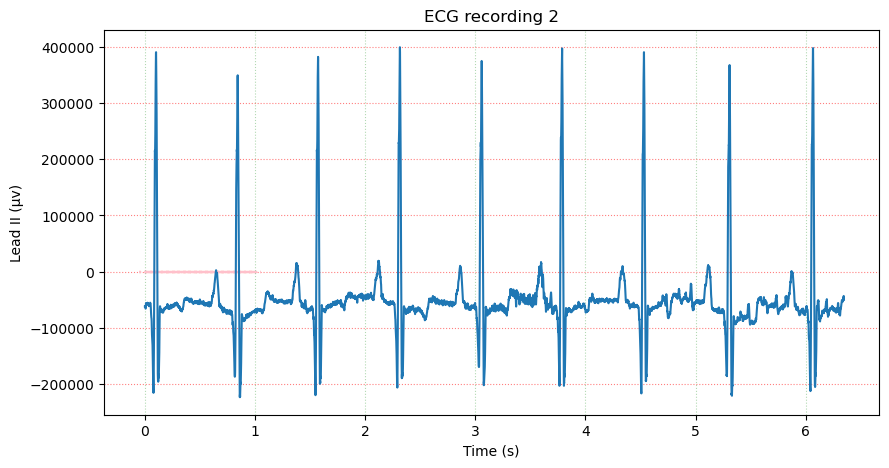

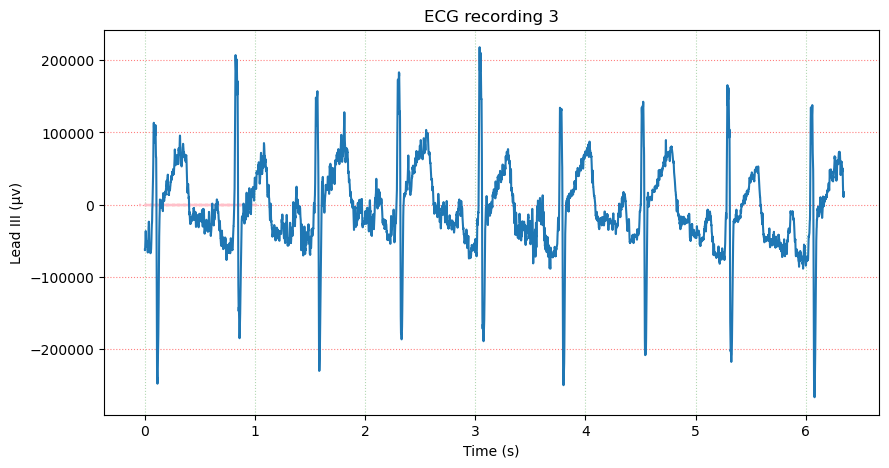

In [55]:
import matplotlib.pyplot as plt

# Première figure
fig, ax = plt.subplots(figsize=(10, 5))

# GRADUATION
# Lignes verticales
ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) #  alpha=0.3 donc opacité de 30% 
# Lignes horizontales
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
# Lignes horizontales additionnelles 
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_1)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead I (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 1')

# Seconde figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_2)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead II (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 2')

# Troisième figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.5, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_3)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead III (µv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 3')

plt.show()

#### **Mettre en mv**

In [67]:
ecg_I = ecg_1 / 1000 # µm en mm
ecg_II = ecg_2 / 1000
ecg_III = ecg_3 / 1000

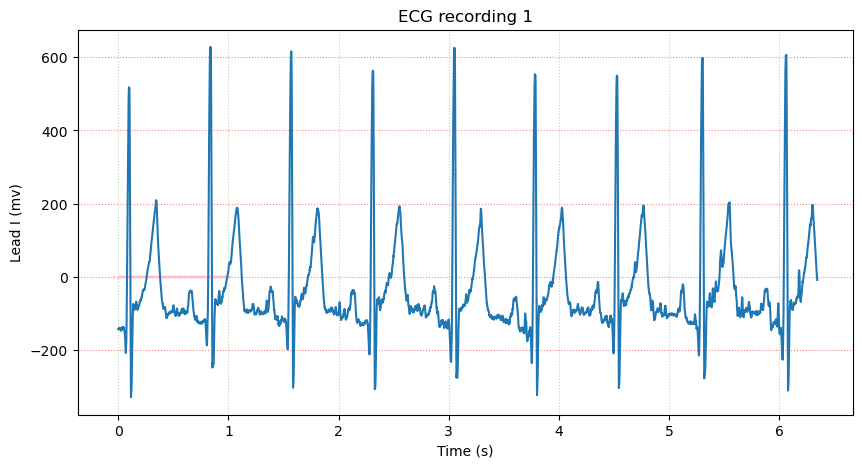

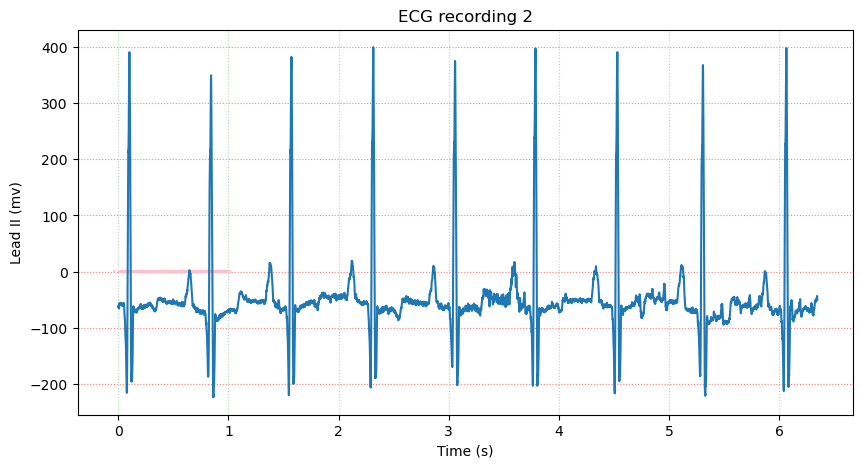

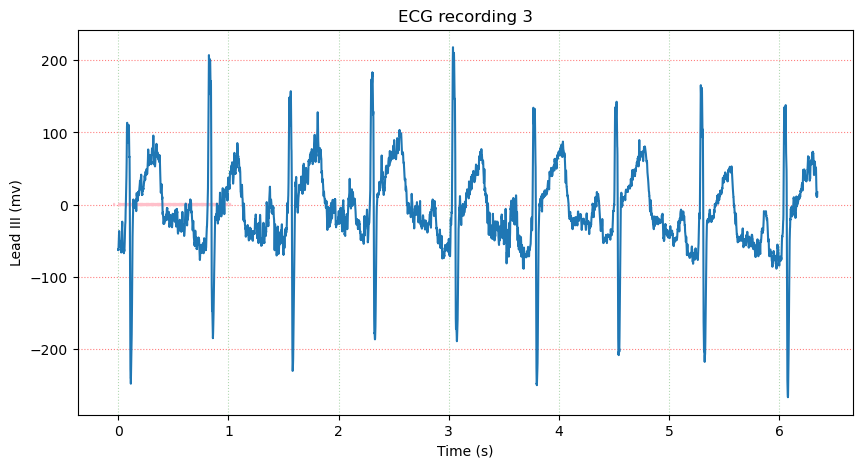

In [65]:
import matplotlib.pyplot as plt

# Première figure
fig, ax = plt.subplots(figsize=(10, 5))

# GRADUATION
# Lignes verticales
ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) #  alpha=0.3 donc opacité de 30% 
# Lignes horizontales
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
# Lignes horizontales additionnelles 
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_I)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead I (mv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 1')

# Seconde figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_II)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead II (mv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 2')

# Troisième figure
fig, ax = plt.subplots(figsize=(10, 5))

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.5, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_III)
plt.xlabel('Time (s)') # ajout d'un nom d'abscisse
plt.ylabel('Lead III (mv)') # ajout d'un nom d'ordonnée
ax.set_title('ECG recording 3')

plt.show()

#### **Amélioration de la visualitation du rythme cardiaque**

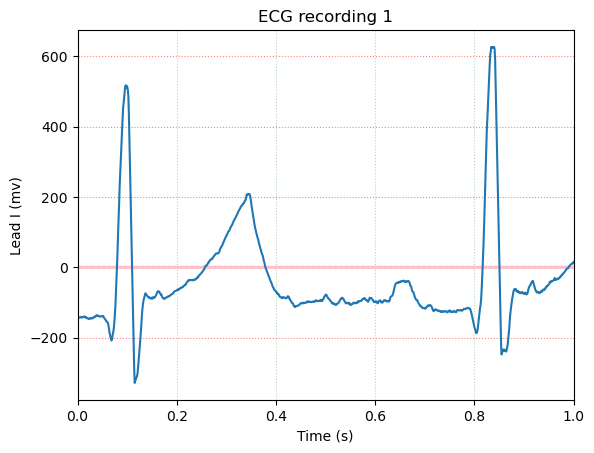

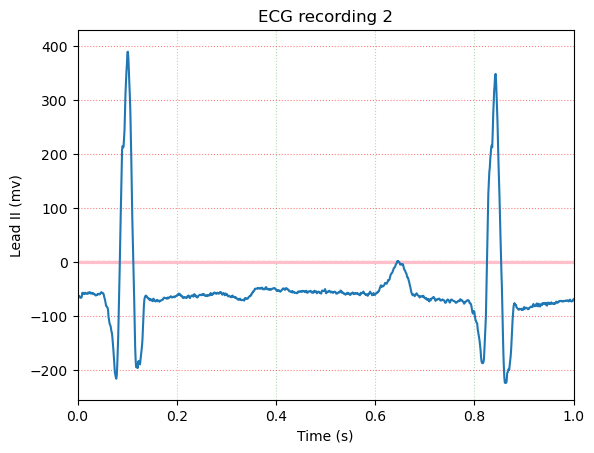

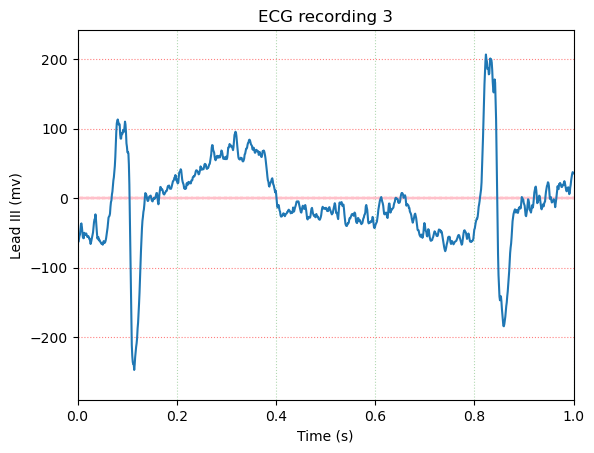

In [70]:
import matplotlib.pyplot as plt

# Première figure
fig, ax = plt.subplots()

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_I)
plt.xlabel('Time (s)') 
plt.ylabel('Lead I (mv)') 
ax.set_title('ECG recording 1')
plt.xlim([0, 1]) # Limite ajouté pour zoom

# Seconde figure
fig, ax = plt.subplots()

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_II)
plt.xlabel('Time (s)') 
plt.ylabel('Lead II (mv)') 
ax.set_title('ECG recording 2')
plt.xlim([0, 1]) # Limite ajouté pour zoom

# Troisième figure
fig, ax = plt.subplots()

ax.grid(True, axis='x', linestyle=':', color='green', alpha=0.3) 
ax.grid(True, axis='y', linestyle=':', color='red', alpha=0.5)
ax.hlines(np.arange(-0.4, 1.0, 0.2),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles='-', alpha=0.7)
ax.hlines(np.arange(-0.5, 1.0, 0.1),xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='pink', linestyles=':', alpha=0.2)

plt.plot(time,ecg_III)
plt.xlabel('Time (s)') 
plt.ylabel('Lead III (mv)') 
ax.set_title('ECG recording 3')
plt.xlim([0, 1]) # Limite ajouté pour zoom

plt.show()

# 1.2.3. Answer the following questions:
- Does this ECG look correctly scaled to you? Please explain.
- Is this a normal ECG? Please explain

Documentation : https://dominiquemakowski.github.io/post/2019-05-17-simulate_ecg/
https://medium.com/@lalesena/how-to-analyze-ecgs-with-python-396e34ece937
https://en.my-ekg.com/basic-principles/paper-ekg.html#:~:text=Electrocardiogram%20paper%20The%20vertical%20axis%20measures%20the%20amplitude,0.1%20mV%20and%20each%20large%20square%2C%200.5%20mV.


On peut voir que les différentes formes d'ondes (P,QRS,T) qui compose un rythme cardiaque semble se comporter correctement.
Mais on peut constater que sur la figure "ECG recording 2" on a une onde T qui représente la repolarisation ventriculaire, elle est donc censé croître mais ça n'est pas le cas dans cette figure contrairement aux autres. 

Au niveau de l'échelle, on est censé avoir des amplitudes en millivolts (mV) alors qu'ici on est à 10-3 mv. 


## APPLIQUER UN FILTRE PASSE BAS : 

- atténue les hautes fréquences
- permet de supprimer le bruit 

https://www.e-cardiogram.com/filtre-ecg/

In [221]:
# Fréquence de coupure 
taux_echantillonnage = 1024  # Hz
frequence_coupure = 400.0

# Calcul des coefficients du filtre Butterworth
nyquist = 0.5 * taux_echantillonnage
normalise_frequence_coupure = frequence_coupure / nyquist
ordre = 4  # Ordre du filtre
b, a = butter(ordre, normalise_frequence_coupure, btype='low') # Conception de filtre numérique et analogique Butterworth. 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

# Filtre à chaque signal ECG
ecg_i_filtre = lfilter(b, a, ecg_I)
ecg_ii_filtre = lfilter(b, a, ecg_II)
ecg_iii_filtre = lfilter(b, a, ecg_III)

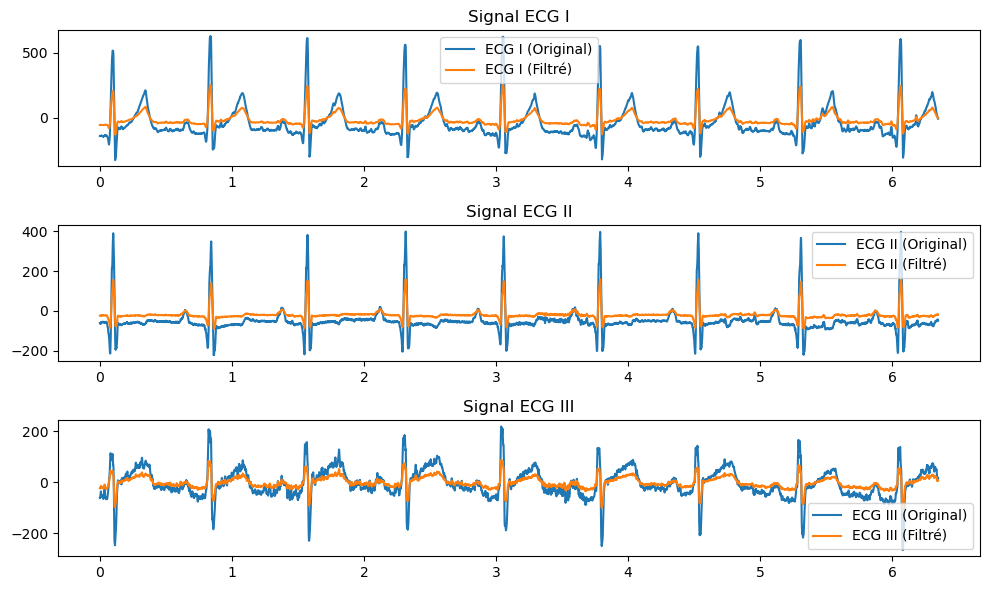

In [219]:
# Tracer les signaux d'origine et les signaux filtrés
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time,ecg_I, label='ECG I (Original)')
plt.plot(time,ecg_i_filtre, label='ECG I (Filtré)')
plt.title('Signal ECG I')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time,ecg_II, label='ECG II (Original)')
plt.plot(time,ecg_ii_filtre, label='ECG II (Filtré)')
plt.title('Signal ECG II')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time,ecg_III, label='ECG III (Original)')
plt.plot(time,ecg_iii_filtre, label='ECG III (Filtré)')
plt.title('Signal ECG III')
plt.legend()

plt.tight_layout()

https://www.kaggle.com/code/mineshjethva/dsp-ecg-signal-cleaning

https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

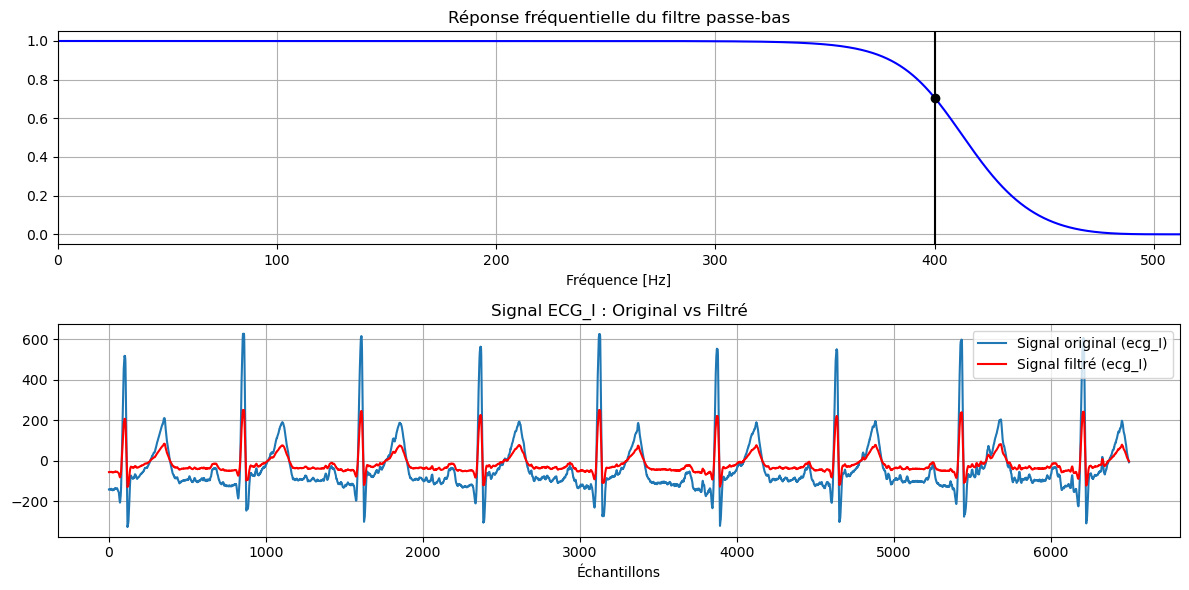

In [228]:
# Fonction pour créer le filtre passe-bas
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

# Fonction pour appliquer le filtre passe-bas au signal
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)  # Utiliser lfilter pour appliquer le filtre
    return y

# Paramètres du filtre
order = 4
fs = 1024.0       # Fréquence d'échantillonnage, Hz
cutoff = 400.0     # Fréquence de coupure, Hz

# Coefficients du filtre pour vérifier la réponse fréquentielle
b, a = butter_lowpass(cutoff, fs, order)

# Tracer la réponse fréquentielle du filtre
w, h = freqz(b, a, fs=fs, worN=8000)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Réponse fréquentielle du filtre passe-bas")
plt.xlabel('Fréquence [Hz]')
plt.grid()

# Appliquer le filtre passe-bas au signal ecg_I
filtered_ecg_I = butter_lowpass_filter(ecg_I, cutoff, fs, order)

# Tracer le signal original et le signal filtré
plt.subplot(2, 1, 2)
plt.plot(ecg_I, label='Signal original (ecg_I)')
plt.plot(filtered_ecg_I, label='Signal filtré (ecg_I)', color='red')
plt.title("Signal ECG_I : Original vs Filtré")
plt.xlabel('Échantillons')
plt.grid()
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()